In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import scipy.stats as stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

db_url = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'

engine = create_engine(db_url)

sp_df = pd.read_sql_query('SELECT * FROM studentsperformance;', con=engine)

# close the db connetion
engine.dispose()

In [3]:
sp_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

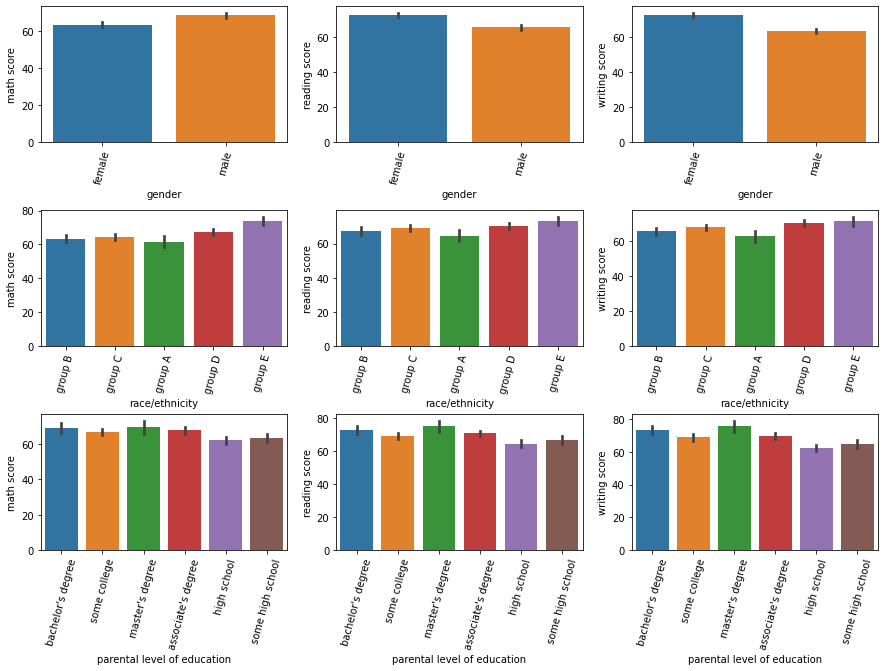

In [14]:
compare_cols = ['gender', 'race/ethnicity', 'parental level of education']
perf_cols = ['math score','reading score', 'writing score']
plot_num = 1
plt.figure(figsize=[15,10])

for ccol in compare_cols:
    for pcol in perf_cols:
        plt.subplot(3,3, plot_num)
        fig = sns.barplot(data=sp_df, x=ccol, y=pcol)
        fig.tick_params(axis='x', labelrotation=75)
        plot_num += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

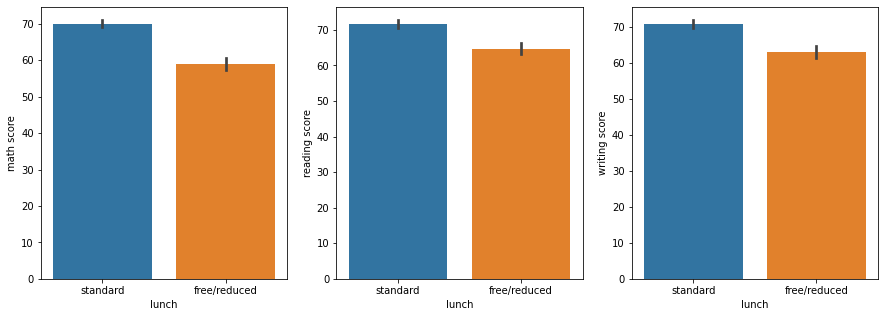

In [20]:
plot_num = 1
plt.figure(figsize=[15,5])

for pcol in perf_cols:
    plt.subplot(1,3, plot_num)
    fig = sns.barplot(data=sp_df, x='lunch', y=pcol)
    plot_num += 1
    
plt.subplots_adjust(hspace=0.5)
plt.show()
    

### 3. Does the test preparation course seem to have an effect on the exam performances?

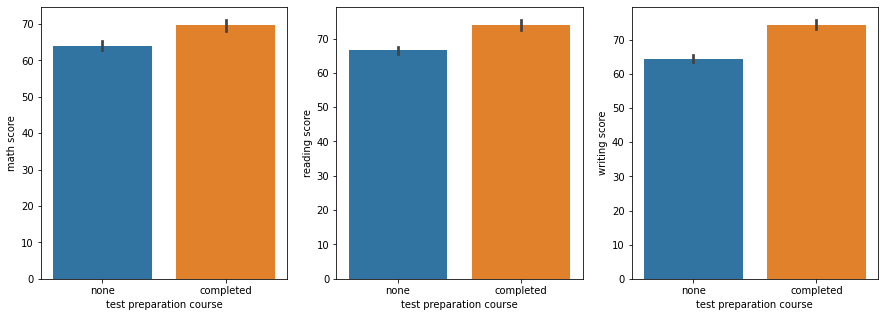

In [21]:
plot_num = 1
plt.figure(figsize=[15,5])

for pcol in perf_cols:
    plt.subplot(1,3, plot_num)
    fig = sns.barplot(data=sp_df, x='test preparation course', y=pcol)
    plot_num += 1
    
plt.subplots_adjust(hspace=0.5)
plt.show()
    

### 4. Which 2 exam scores are most correlated with each other?

In [24]:
sp_df.filter(like='score', axis=1).corr()
# reading score and writing score

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000
